# User Purchase **Classification** Prediction using SVM(50%)

This project implements the Support Vector Machine (SVM) algorithm for predicting user purchase classification. The goal is to train an SVM classifier to predict whether a user will purchase a particular product or not.




## 1.Data Pre-processing Step(10%)
Requirements:



*   Data Import:Use Pandas to import user_data.csv and store it as a DataFrame.Display the first five rows of the data and the data types for each column.(2%)
*   Feature Selection:Extract the independent variables (features) and the dependent variable (label) from the dataset.
Independent variables should include:
age
estimated_salary
The dependent variable is:
purchased, which depends on the individual's age and estimated salary. (2%)
*   Data Splitting:Use the train_test_split function from the sklearn.model_selection module to split the data into training and test sets.
The data should be split into 75% training data and 25% test data, with random_state=0 to ensure reproducibility. (3%)
*   Feature Scaling:Use StandardScaler to standardize the features.
Apply fit_transform to scale the training set, and use transform to apply the same transformation to the test set.
 (3%)




https://github.com/Taliahsieh/Machine_Learning_2024/tree/main



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import data
df = pd.read_csv('svm_classification_user_data.csv')
print(df.head(5))

print(f"\nData Types:\n{df.dtypes}")

# Select features and label
X = df[['age', 'estimated_salary']]
y = df['purchased']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Scale features
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

print(f"\nScaled training set:")
print(X_train_std[:5])

    user_id  gender  age  estimated_salary  purchased
0  15624510    Male   19             19000          0
1  15810944    Male   35             20000          0
2  15668575  Female   26             43000          0
3  15603246  Female   27             57000          0
4  15804002    Male   19             76000          0

Data Types:
user_id              int64
gender              object
age                  int64
estimated_salary     int64
purchased            int64
dtype: object

Training set shape: (300, 2)
Testing set shape: (100, 2)

Scaled training set:
[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]]


## 2.Support Machine Vector(SVM) Alogrithm(20%)

You can use The SVM algorithm is implemented using the SVC (Support Vector Classifier) class from the sklearn.




In [2]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)

## 3.Predicting the Test Set Result(10%)

You can store the predicted values in the vector and compare with the actual values to evaluate the performance of the classifier.You need to print the accuracy score




In [3]:
from sklearn.metrics import accuracy_score

svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Accuracy score: 0.9


## 4.Visualizing the Training and Test Set  Result(10%)
The training set result is visualized using the contourf and scatter functions from the matplotlib.pyplot module. The scatter function is used to plot the data points, with different colors representing different classes.
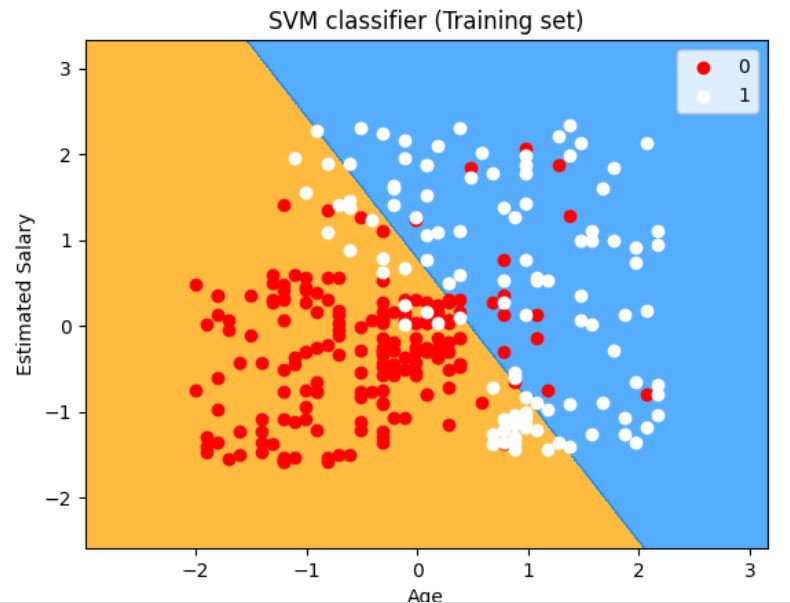



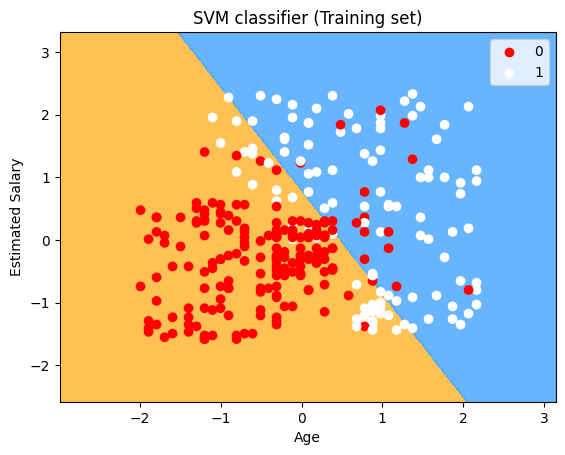

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a mesh to plot in
x1_min, x1_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
x2_min, x2_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                     np.arange(x2_min, x2_max, 0.02))   # Create a mesh grid for feature 1 and feature 2, with intervals of 0.02 for plotting boundaries

# Obtain labels for each point in mesh using the model.
Z = svm.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

# Plot
bg_colors = ['#FFBB40', '#56ACFF']
bg_cmap = ListedColormap(bg_colors)
plt.contourf(xx1, xx2, Z, cmap=bg_cmap, alpha=0.9)  # Plot the decision boundaries (決策邊界)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

point_colors = ['red', 'white']
point_cmap = ListedColormap(point_colors)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap=point_cmap)   # Scatter plot for the training points 繪製訓練數據的散點圖

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('SVM classifier (Training set)')

# Create empty scatter plots to generate legend (標記) entries for each class
plt.scatter([], [], c='red', label='0')
plt.scatter([], [], c='white', label='1')
plt.legend()

plt.show()

# **Regression(50%)**

Complete the following steps to generate data, train a Support Vector Regression (SVR) model, and visualize the results.



# 1.Data Generation and Processing(10%)

Use make_regression generate a dataset with 1000 data points and three features, set the noise parameter to noise=5.0 to simulate real-world data variability and random_state=100 to ensure reproducibility of the results.



In [5]:
from sklearn.datasets import make_regression

num_samples = 1000
num_features = 3
X, y = make_regression(
    n_samples=num_samples,
    n_features=num_features,
    noise=5.0,
    random_state=100
)

# 2.Standardize Data(5%)

Use StandardScaler to standardize the features, standardizing them to have a mean of 0 and a standard deviation of 1.

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_std = sc.fit_transform(X)

# 3.Train SVM model(5%)

Train a Support Vector Regression (SVR) model to predict the target variable.

In [7]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')

# Train the model
svr.fit(X_std, y)

# Predict
y_pred = svr.predict(X_std)

# 4.Model Analysis and Output(15%)



*   Print Number of Support Vectors: Use reg.support_vectors_ to show the number of support vectors used by the model.
*   Print Prediction Samples: Select any 5 data points from the dataset and use reg.predict() to print the predicted values and compare them with the actual target values.
*   Print Mean Squared Error (MSE).



In [8]:
from sklearn.metrics import mean_squared_error

# Number of support vectors
print(f"Number of support vectors: {svr.support_vectors_.shape[0]}\n")

# Predicted values compared to actual values
# 1. Select 5 data points randomly
random_indices = np.random.choice(len(X_std), 5, replace=False)
X_sample = X_std[random_indices]
y_sample = y[random_indices]

# 2. Predict
y_sample_pred = svr.predict(X_sample)

# 3. Print the results
print("Index\tActual\tPredicted")
for idx, (actual, predicted) in zip(random_indices, zip(y_sample, y_sample_pred)):
    print(f"{idx}\t{actual:.3f}\t{predicted:.3f}")
print()

# MSE
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse:.3f}")

Number of support vectors: 978

Index	Actual	Predicted
811	104.461	101.406
181	186.285	181.939
583	-105.545	-111.192
353	64.617	65.482
758	197.738	201.677

MSE: 27.382


# 5.Visualize the model and result(15%)
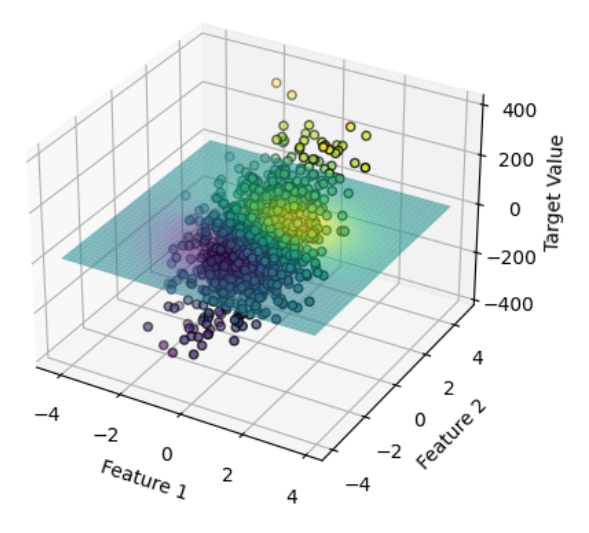

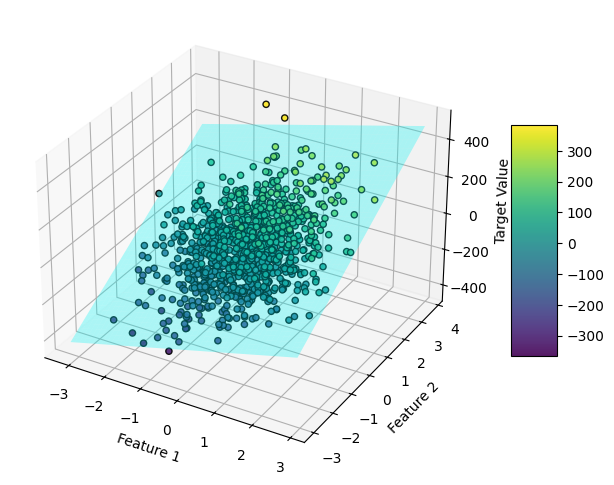

In [9]:
import matplotlib.pyplot as plt

# Select two features
feature_1 = X_std[:, 0]
feature_2 = X_std[:, 1]

# Plot the data
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(feature_1, feature_2, y, c=y, cmap='viridis', alpha=0.9, edgecolors='black')

# Plot the hyperplane
coef = svr.coef_
intercept = svr.intercept_

x_range = np.linspace(feature_1.min(), feature_1.max(), num=50)
y_range = np.linspace(feature_2.min(), feature_2.max(), num=50)
xx, yy = np.meshgrid(x_range, y_range)

Z = coef[0][0] * xx + coef[0][1] * yy + intercept   # Calculate the corresponding z values

ax.plot_surface(xx, yy, Z, color='cyan', alpha=0.3)

# Add a color bar for prediction values
plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)

# Set axis labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target Value')

plt.show()